In [1]:
%load_ext autoreload
%autoreload 2
# %matplotlib qt
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

### There are 3 coordinate frames we are interested in

1) “scanner RAS” (right, anterior, superior) [mm]
1) “scanner LIA” (left, inferior, anterior) [mm]
2) Voxel space (x, y, z) (256, 256, 256)

In [38]:
import mne
import nibabel as nib
import numpy as np
from cerebra_atlas_python.plotting import imshow_mri, plot_brain_slice_2D
from cerebra_atlas_python.cerebra import CerebrA, setup_logging
from cerebra_atlas_python.utils import move_LIA_to_RAS

In [66]:
cerebra = CerebrA()
# cerebra.cerebra_img.orthoview()

In [62]:
for k,v in cerebra.t1_img.header.items():
    print(f"{k= } {v= }")

k= 'version' v= array(1, dtype=int32)
k= 'dims' v= array([256, 256, 256,   1], dtype=int32)
k= 'type' v= array(0, dtype=int32)
k= 'dof' v= array(1, dtype=int32)
k= 'goodRASFlag' v= array(1, dtype=int16)
k= 'delta' v= array([1., 1., 1.], dtype=float32)
k= 'Mdc' v= array([[-1.,  0.,  0.],
       [ 0.,  0., -1.],
       [ 0.,  1.,  0.]], dtype=float32)
k= 'Pxyz_c' v= array([  0.5, -17.5,  18.5], dtype=float32)
k= 'tr' v= array(0., dtype=float32)
k= 'flip_angle' v= array(0., dtype=float32)
k= 'te' v= array(0., dtype=float32)
k= 'ti' v= array(0., dtype=float32)
k= 'fov' v= array(256., dtype=float32)


In [64]:
cerebra.t1_img.affine

array([[  -1. ,    0. ,    0. ,  128.5],
       [   0. ,    0. ,    1. , -145.5],
       [   0. ,   -1. ,    0. ,  146.5],
       [   0. ,    0. ,    0. ,    1. ]])

In [65]:
move_LIA_to_RAS(cerebra.t1_img.affine)

ValueError: Axes=(1, 2) out of range for array of ndim=2.

<AxesSubplot:xlabel='Y (I)', ylabel='Z (A)'>

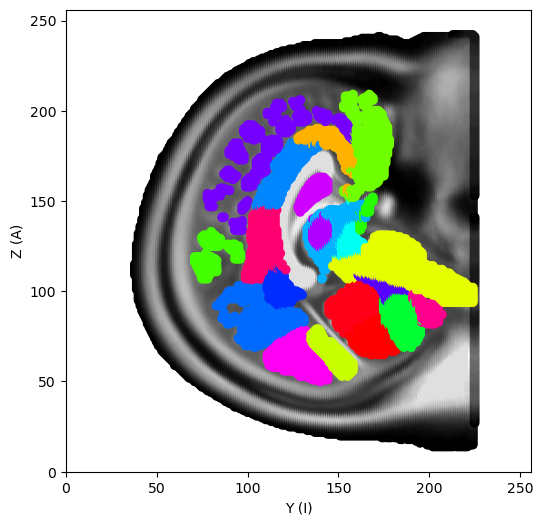

In [72]:
ax = plot_brain_slice_2D(cerebra.t1_data, axis=0, cmap_name='gray')
plot_brain_slice_2D(cerebra.volume_data, cerebra.cerebra_img.affine, axis=0, ax=ax,plot_whitematter=False) 

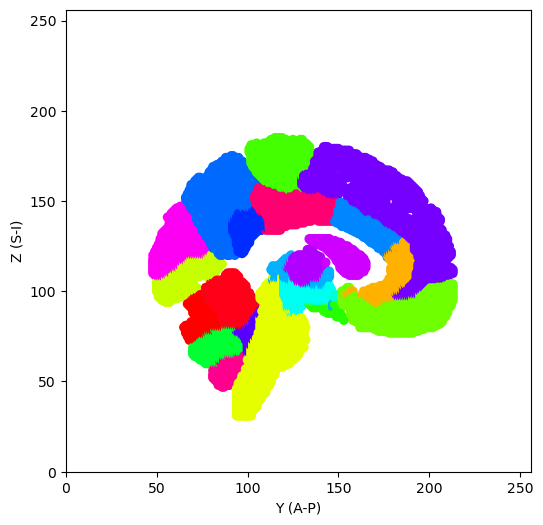

(0.0, 256.0)

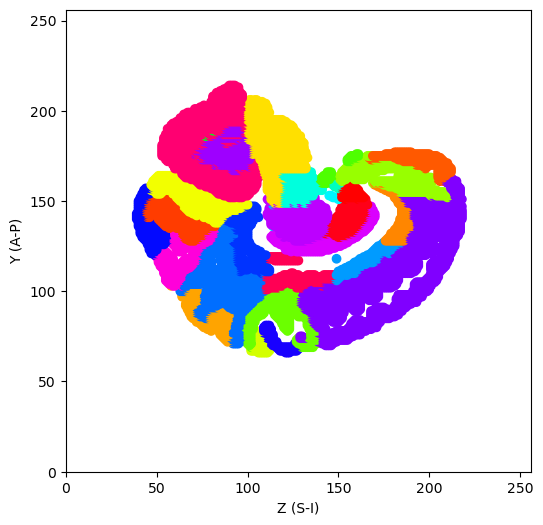

In [17]:
import matplotlib.pyplot as plt
import random
import matplotlib.colors
from einops import rearrange



ys = []
zs = []
cs = []

norm=plt.Normalize(0,103)
cmap = get_cmap(103)

vol_data = cerebra.volume_data

# vol_data = np.rot90(vol_data,-1, axes=(1,2))
# np.fliplr = 


for y in range(0,256,1):
    for z in range(0,256,1):
        x=120
        if vol_data[x,y,z] != 0 and vol_data[x,y,z] != 103 :
            ys.append(y)
            zs.append(z)
            cs.append(vol_data[x,y,z])

ax.scatter(zs,ys,c=cs,cmap=cmap)
ax.set_xlabel("Z (S-I)")
ax.set_ylabel("Y (A-P)")

ax.set_xlim([0,256])
ax.set_ylim([0,256])


In [17]:
import sys

In [22]:
(cerebra.volume_data == 0).sum()

14503981

In [20]:
sys.getsizeof(cerebra.volume_data)

67109000

In [19]:
sys.getsizeof(cerebra.volume_data_sparse)

4696

In [6]:
cerebra.volume_data.shape

(256, 256, 256)

In [4]:
cerebra = CerebrA()
# cerebra.orthoview()

AttributeError: 'CerebrA' object has no attribute 'orthoview'

In [104]:
cerebra = CerebrA()

In [106]:
cerebra.volume_data

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [105]:
nib.orientations.aff2axcodes(cerebra.cerebra_img.affine)

('L', 'I', 'A')

In [91]:
cerebra.ras_to_voxel(30,23,-20)

array([ 98, 166, 168])

[128 146 146]
[128 146 146]
[128 146 146]


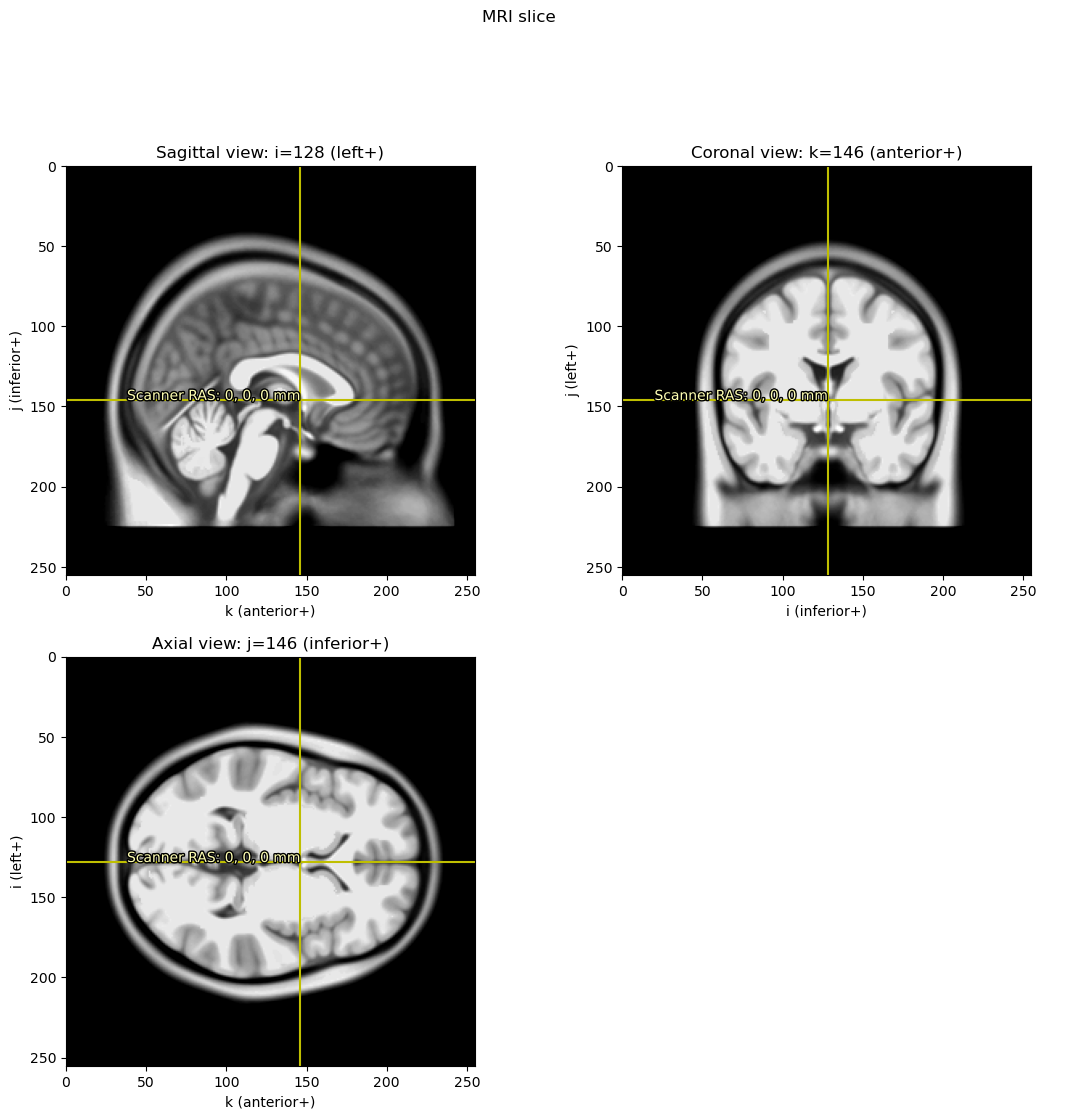

In [100]:
cerebra.plot_mri_ras(0,-0,0)

In [33]:
xyz_ras_raw=np.array([50.50000077, 22.49999903, 48.49999957])
# Transform to voxel
t1 = nib.load(f'{SUBJECT_DIR}/mri/T1.mgz')
vox_raw = np.round(mne.transforms.apply_trans(np.linalg.inv(t1.affine), xyz_ras_raw)).astype(int)
vox_raw

array([ 78,  98, 168])

In [23]:
mne.transforms.apply_trans(t1.affine, vox_raw).astype(int)

array([51, 21, 48])

In [24]:
t1.affine

array([[  -1. ,    0. ,    0. ,  128.5],
       [   0. ,    0. ,    1. , -145.5],
       [   0. ,   -1. ,    0. ,  146.5],
       [   0. ,    0. ,    0. ,    1. ]])

In [18]:
data = np.asarray(t1.dataobj)
imshow_mri(data, t1, vox_raw, {'Scanner RAS': xyz_ras_raw}, 'MRI slice')
pass

In [34]:
cerebra = CerebrA()
cerebra.voxel_to_ras(vox_raw[0], vox_raw[1], vox_raw[2])

array([50.5, 22.5, 48.5])